# Project 1

## [손수 설계하는 선형회귀] : 당뇨병 수치 맞추기

### 1. 모듈 가져오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from matplotlib.animation import FuncAnimation

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

### 2. Diabetes data load
> * load_diabetes() 함수로 diabetes lode <br> diabetes data : 442행 10열 형식

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target
print(df_x.shape) # 데이터 개수 확인
print(diabetes.target.shape) # target(=label) 데이터 개수 확인

(442, 10)
(442,)


In [3]:
# DataFrame을 확인하면 문자열이 없고 다 수치형인것을 확인 가능
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Data Describe

In [4]:
# Feature data name 확인
diabetes.feature_names
print(diabetes.feature_names)

# Label data name 확인
diabetes_label = diabetes.target
diabetes_label[:10]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

### 3. train, test dataset split

In [5]:
# train, test 데이터 분리
# test data size =>  총 데이터의 20%

x = df_x
y = df_y

diabetesX_train, diabetesX_test, diabetesY_train, diabetesY_test =  train_test_split(x,
                                                                                     y,
                                                                                     test_size = 0.2,
                                                                                     random_state =10)

In [6]:
# 매개변수 초기화 해주기 # w:10, b:1(상수)
w = np.random.rand(10)
b = np.random.rand()

In [7]:
# 모델 만들기
def  model (x,w,b) :
    predictions = 0
    for i in range(10):
        predictions += x[:,i]*w[i]
    predictions +=b
    return predictions

In [8]:
# 손실함수 (MSE)
def MSE (a,b) :
    mse = ((a-b)**2).mean() # 두값의 차이의 제곱의 평균
    return mse

In [9]:
# 손실함수 만들기 (loss)

def loss (x,w,b,y):
    predictions = model(x,w,b)
    L = MSE(predictions,y)
    return L

In [10]:
def gradient(x, w, b, y):
    # N은 가중치의 개수
    N = len(w)
    
    # y_pred 준비
    y_pred = model(x, w, b)
    
    # 공식에 맞게 gradient 계산
    dw = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dw, db

In [11]:
dw, db = gradient(x, w, b, y)
print("dw:", dw)
print("db:", db)

dw: [ -60.6055778   -13.80038573 -189.48002043 -142.67032744  -68.1951198
  -55.90138377  127.54803897 -138.87926226 -182.7861899  -123.51062421]
db: -303.6438842275859


In [12]:
# 학습률  : 0.01
LEARNING_RATE = 0.09

In [13]:
losses = []

for i in range(1, 1001):
    dw, db = gradient(diabetesX_train, w, b, diabetesY_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(diabetesX_train, w, b, diabetesY_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4650.9870
Iteration 20 : Loss 3654.7647
Iteration 30 : Loss 3386.8746
Iteration 40 : Loss 3241.0335
Iteration 50 : Loss 3146.4348
Iteration 60 : Loss 3079.6320
Iteration 70 : Loss 3030.4512
Iteration 80 : Loss 2993.5122
Iteration 90 : Loss 2965.4804
Iteration 100 : Loss 2944.0759
Iteration 110 : Loss 2927.6588
Iteration 120 : Loss 2915.0197
Iteration 130 : Loss 2905.2554
Iteration 140 : Loss 2897.6864
Iteration 150 : Loss 2891.7995
Iteration 160 : Loss 2887.2050
Iteration 170 : Loss 2883.6063
Iteration 180 : Loss 2880.7773
Iteration 190 : Loss 2878.5445
Iteration 200 : Loss 2876.7749
Iteration 210 : Loss 2875.3663
Iteration 220 : Loss 2874.2396
Iteration 230 : Loss 2873.3338
Iteration 240 : Loss 2872.6015
Iteration 250 : Loss 2872.0059
Iteration 260 : Loss 2871.5183
Iteration 270 : Loss 2871.1163
Iteration 280 : Loss 2870.7824
Iteration 290 : Loss 2870.5027
Iteration 300 : Loss 2870.2664
Iteration 310 : Loss 2870.0649
Iteration 320 : Loss 2869.8914
Iteration 330 : L

In [14]:
w, b

(array([   0.66722181, -219.71916991,  529.19478015,  323.87019664,
        -114.67386875,  -69.90379899, -189.9558907 ,  139.3946851 ,
         468.0207201 ,   43.08686929]),
 152.12428212864364)

In [15]:
prediction = model(diabetesX_test, w, b)
mse = loss(diabetesX_test, w, b, diabetesY_test)
mse

2940.9568148442922

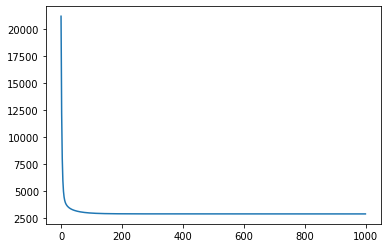

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

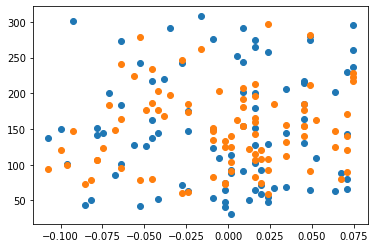

In [17]:
plt.scatter( diabetesX_test[:, 0],  diabetesY_test)
plt.scatter( diabetesX_test[:, 0], prediction)
plt.show()

### [sklearn으로 구현]

In [18]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target

# 모델에 입력할 데이터 X,Y 준비하기
x = np.array(df_x)
y = np.array(df_y)

In [19]:
# train, test 데이터 분리
# test data size =>  총 데이터의 20%

diabetesX_train, diabetesX_test, diabetesY_train, diabetesY_test =  train_test_split(x,
                                                                                   y,
                                                                                   test_size = 0.2,
                                                                                   random_state =10)

In [20]:
# 선형회귀 모델 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
model.fit(diabetesX_train,diabetesY_train)

LinearRegression()

In [22]:
predictions = model.predict(diabetesX_test)
predictions

array([148.0978202 , 208.21400551, 186.40125844,  82.48876916,
       163.39689627, 126.17904513, 126.17880476, 264.70212482,
        78.54654307,  73.56261024, 124.46582144, 142.22854705,
       166.4549438 ,  98.5009742 ,  49.71902346, 223.51963411,
       143.44310503, 110.50382605, 202.53415354,  78.49893296,
       191.80901882, 243.20695862,  75.88822445, 214.90606332,
        55.73078912, 158.0288059 , 157.54022573, 158.88728076,
       166.2184483 , 107.63124236, 276.82392637, 179.20197197,
        60.48832138, 157.42965435, 218.98333103, 182.29672873,
        70.84400009, 186.74011272, 285.13886084, 196.19611072,
       202.26256246, 145.38319546, 215.02583484, 124.55391269,
        80.17027241,  98.99544054,  82.02453761,  83.40439369,
       289.99388729, 134.33663141, 112.1313993 , 152.32625919,
       109.90441466, 226.28134724, 245.74116064,  85.56172621,
       122.28262271, 139.20254207, 198.95361934, 120.92252444,
       179.99231965, 106.43580454, 123.03066928,  96.46

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(diabetesY_test, predictions)
mse

2911.827951689161

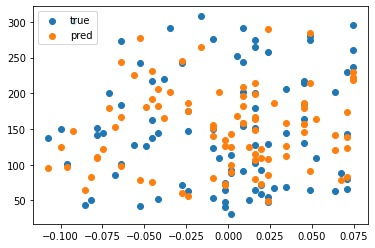

In [24]:
plt.scatter(diabetesX_test[:, 0], diabetesY_test, label="true")
plt.scatter(diabetesX_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## 회고

* 가중치 (= 매개변수, 파라미터) 변화도 중요하지만 학습률에 따라 매우 확연한 차이가 있음을 확인함. 

* 애니메이션을 통해 losses값의 변화를 gif로 시각화 하려고 하였으나, 시간관계상 하지 못했음 (이후, 업데이트 하여 깃허브에 업로더 할 예정)

* 손수만든 경사하강법과 사이킷런의 경사하강법의 모델학습한 차이는 수치상 차이가 많이 나는 듯 하지만 시각화를 통해 이 수치는 큰 차이는 나지 않음을 확인하여 손수 만든 모델도 파라미터를 잘 활용하면 좋은 결과치를 낼 수 있을 것 같다고 생각됨 

---

# Project 2

## 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇명?

### 1. 모듈 가져오기

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

### 2. bike-sharing data load

In [26]:
df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* datetime: hourly date + timestamp
* season: 1=봄, 2=여름, 3=가을, 4=겨울
* holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
* workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
* weather:
>1=맑음, 약간 구름 낀 흐림
>2=안개, 안개 + 흐림
>3=가벼운 눈, 가벼운 비 + 천둥
>4=심한 눈/비, 천둥/번개
* temp: 온도(섭씨)
* atemp: 체감온도(섭씨)
* humidity: 상대습도
* windspeed: 풍속
* casual: 사전에 등록되지 않은 사용자가 대여한 횟수
* registered: 사전에 등록된 사용자가 대여한 횟수
* count: 대여 횟수

In [28]:
#bike-sharing data 자료형 확인
print(df.dtypes) 
# datetime object형 -> 자료형으로 변환시켜줘야함

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [29]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year']=df['datetime'].dt.year # 연도 정보
df['month']=df['datetime'].dt.month # 월 정보
#df['month_name'] = df['datetime'].dt.month_name()
df['day']=df['datetime'].dt.day # 일 정보
df['hour']=df['datetime'].dt.hour # 시간 정보
df['minute']=df['datetime'].dt.minute # 분 정보
df['second']=df['datetime'].dt.second # 초 정보

In [30]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [31]:
# Data columns 원하는 대로 정렬
df = df[['datetime','year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']]

In [32]:
df.head()

,datetime,year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* 새롭게 datetime 분리된 칼럼이 생성되었으므로 datetime이 필요하지 않음 삭제!
* casual 칼럼은 사전에 등록하지 않은 사용자의 자전거 대여 횟수이고
* registered는 사전에 등록한 사용자의 대여 횟수이며
* casual + registered = count이므로 casual과 registered가 따로 필요 않다고 판단
* 두 칼럼을 삭제!

In [33]:
df = df.drop(['datetime','casual','registered'],axis=1)

In [34]:
df.head()

,year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0,40
2,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0,32
3,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0,13
4,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0,1


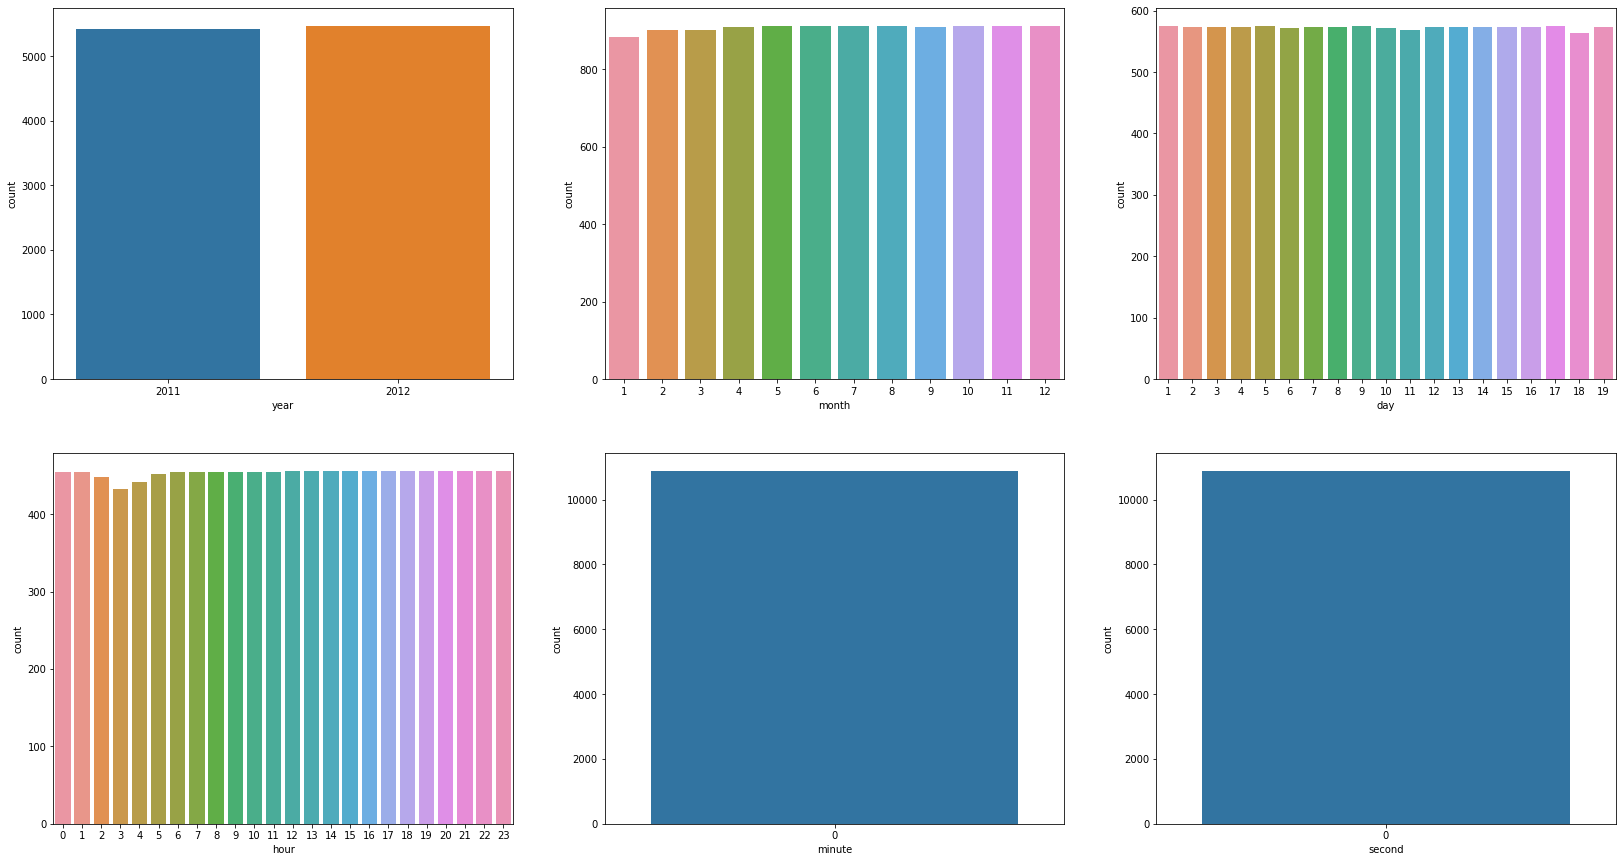

In [35]:
f, ax = plt.subplots(2,3,figsize=(28,15))

sns.countplot('year',data=df, ax=ax[0,0])
sns.countplot('month',data=df, ax=ax[0,1])
sns.countplot('day',data=df, ax=ax[0,2])

sns.countplot('hour',data=df, ax=ax[1,0])
sns.countplot('minute',data=df, ax=ax[1,1])
sns.countplot('second',data=df, ax=ax[1,2])
plt.show()

### 3. train, test dataset split

In [36]:
X =  df[['year','month','day','hour','minute','second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]

y = df['count'].values         

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### 4. LinearRegression 모델 학습

In [38]:
# 선형회귀 모델 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

### 5. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [40]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = mean_squared_error(y_test, predictions)**0.5

print(mse)
print(rmse)

19945.370053753973
141.22807813517102


### 6. 시각화하기

* X축은 temp or humidity
* Y축은 count 

Text(0.5, 1.0, 'humidity vs count')

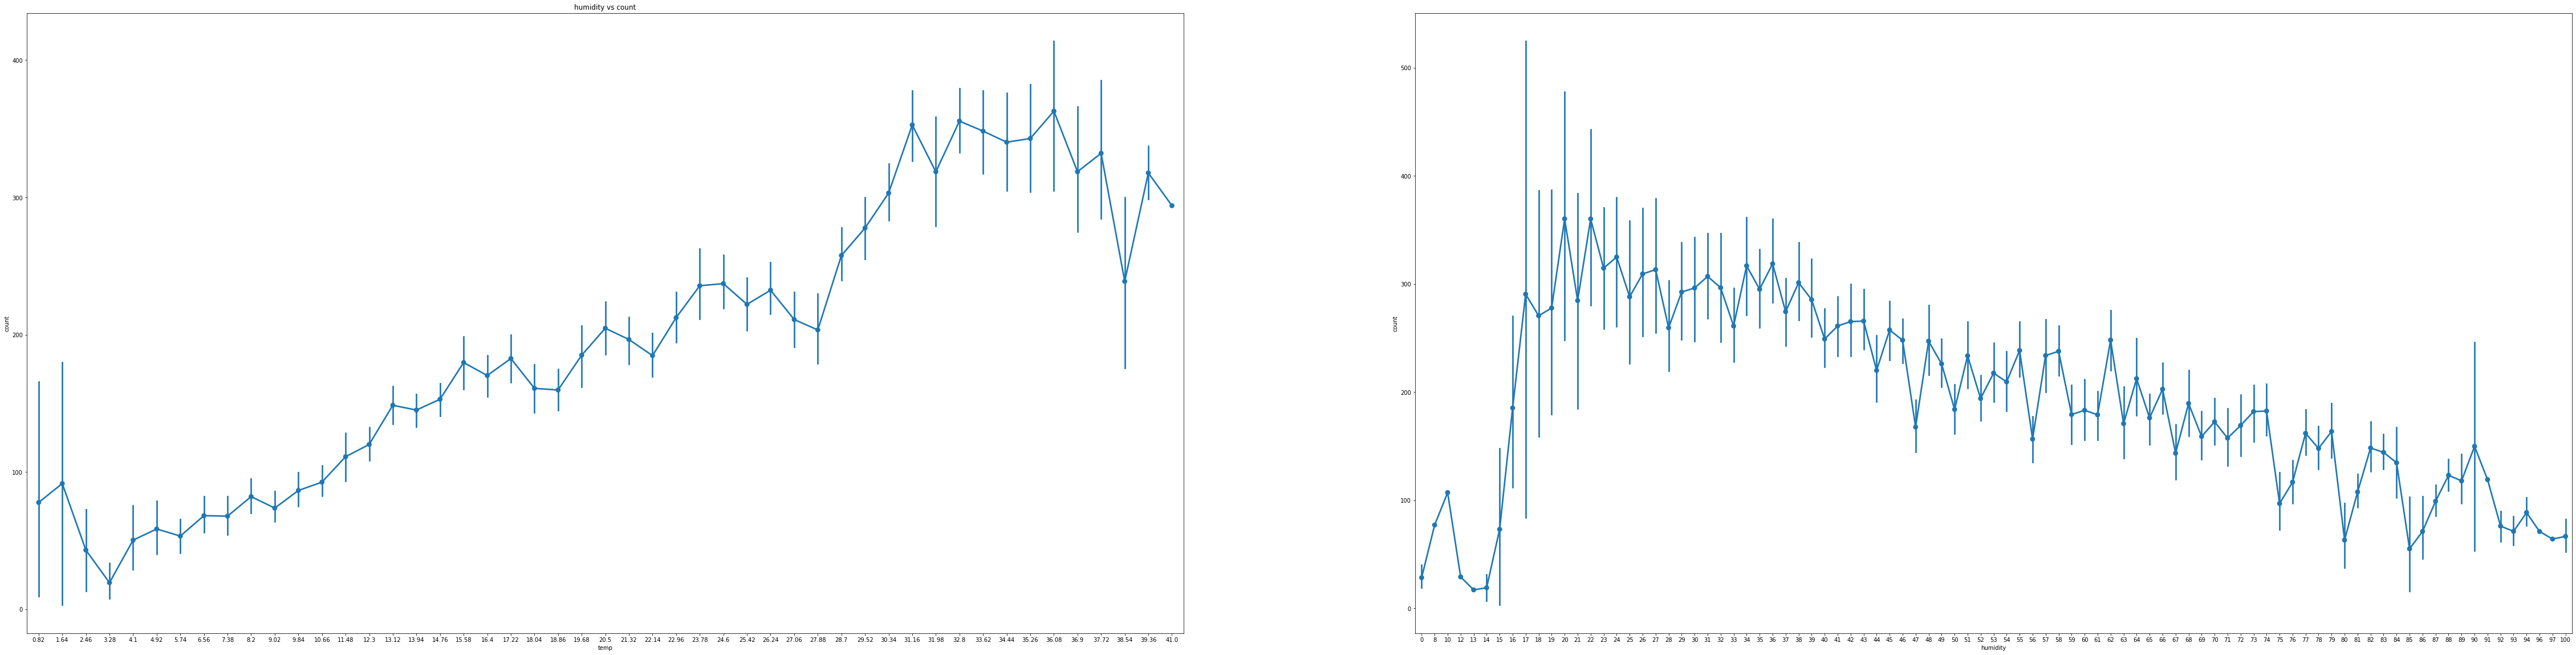

In [42]:
f, ax = plt.subplots(1,2,figsize=(80,20))

sns.pointplot('temp','count',data=df,ax=ax[0])
ax[0].set_title('temp vs count')

sns.pointplot('humidity','count',data=df,ax=ax[1])
ax[0].set_title('humidity vs count')

* 온도가 높아질수록 자전거 대여가 많고, 오히려 습도가 높을수록 대여율이 낮아짐을 확인됨

* 온도가 높아질수록 자전거 대여율이 높아지는 이유로는 그냥 걷는것보다 자전거를 타면서 불어오는 바람으로 더위 등을 식힐 수 있고 목적지까지 빠르게 도착할 수 있는 등의 이유로 대여율이 높아지지 않을까 하는 예측을 해봄 

* 반면, 습도가 높을수록 대열율이 낮아지는 이유로는 불쾌지수와 상관이 있지 않을까하고 예상하는 바 있음 습도가 높으면 호흡시 무겁다는 느낌을 받고 불쾌지수가 올라가므로써 운동 등 움직임에 대한 모든 것이 저하되는 현상이 있어 대여율이 낮아지지 않을까 하는 예측을 해봄

## 회고

* 각 feature 간의 상관관계 등을 더 관찰력있게 분석해보는것도 좋을 것 같은 데이터 프레임고 캐글 상에서도 다뤄지는 것을 보고 화자가 생각하는 것에 따라 예측하는 방법과 도출되는 결과 등이 다를 수 있음을 확인함 

* 시간 관계상 이 데이터 프레임으로 손수 만든 모델 학습이 아닌 사이킷런을 활용하게 되었지만 이 데이터도 손수 만든 학습모델을 통해 프로젝트 1번과 같이 차이에 대한 결과를 도출해볼 예정 (프로젝트 1번 업데이트 시 함께 업데이트 해 나갈 예정) 